# **Titanic With KNN Exercise**

## **1. Data Acquisition**
**Import required libraries**

Get our environment ready with the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading an example dataset**

In [2]:
train = pd.read_csv("titanic_train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **2. Data Cleaning**

### **Exploratory Data Analysis(EDA)**
Analyzing data sets to summarize their main characteristics, with visual methods.

We'll start by checking out missing data! 

<Axes: >

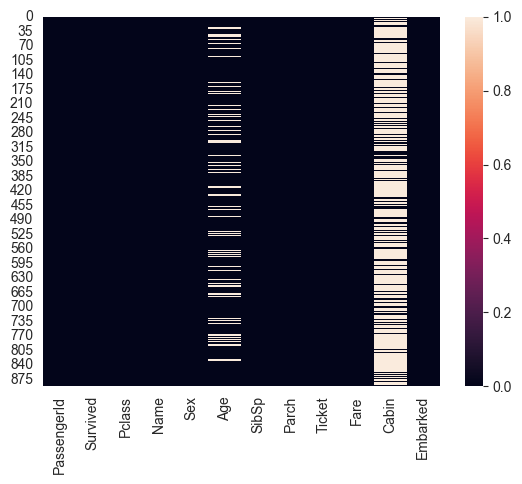

In [3]:
sns.heatmap(train.isnull())

The **Cabin** and **Age** have some missing values. Especially Cabin 77% are null. We will ignore it for now and focus on others. The Age attribute has about 19% null values, replacing the null values with the median seems promissing.


In [4]:
train.drop("Cabin", axis=1, inplace=True)

In [5]:
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<Axes: >

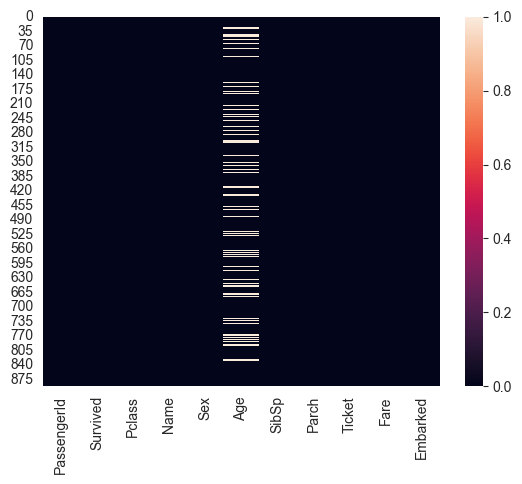

In [6]:
train.isnull()

sns.heatmap(train.isnull())

## **Data Cleaning**

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [7]:
def get_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass ==1:
      return 38
    
    if Pclass ==2:
      return 30

    else:
      return 25
  else:
    return Age

In [8]:
train["Age"] = train[["Age","Pclass"]].apply(get_age, axis=1)

C:\Users\afkjh\AppData\Local\Temp\ipykernel_25232\2268453332.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\afkjh\AppData\Local\Temp\ipykernel_25232\2268453332.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

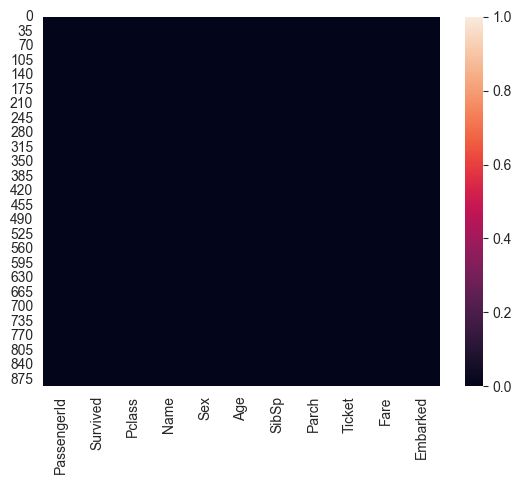

In [9]:
train.isnull()
sns.heatmap(train.isnull())

## **Converting Categorical Features**
We need to convert categorical features to dummy variables using pandas, so that our machine learning algorithm is able to directly take in those features as inputs.

In [10]:
# sklearn can only read numeric data
sex = pd.get_dummies(train["Sex"], drop_first=True)

In [11]:
# train["Embarked"]
embark = pd.get_dummies(train["Embarked"], drop_first= True)

In [12]:
train.drop(["Sex","Embarked","Name","Ticket"], axis=1, inplace=True)

In [13]:
# concatenation
train= pd.concat([train,sex,embark],axis=1)

## **3. Model Training & Building**

### **X and y arrays**

In [14]:
# X: Columns except Survived one
X = train.drop("Survived", axis=1)

In [15]:
# y: Survived column
y = train["Survived"]

### **Train Test Split**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [18]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
515,516,1,47.0,0,0,34.0208,True,False,True
25,26,3,38.0,1,5,31.3875,False,False,True
68,69,3,17.0,4,2,7.9250,False,False,True
481,482,2,30.0,0,0,0.0000,True,False,True
124,125,1,54.0,0,1,77.2875,True,False,True
...,...,...,...,...,...,...,...,...,...
86,87,3,16.0,1,3,34.3750,True,False,True
151,152,1,22.0,1,0,66.6000,False,False,True
525,526,3,40.5,0,0,7.7500,True,True,False
779,780,1,43.0,0,1,211.3375,False,False,True


In [19]:
y_train

515    0
25     1
68     1
481    0
124    0
      ..
86     0
151    1
525    0
779    1
668    0
Name: Survived, Length: 623, dtype: int64

### **Creating and Training the Model**

**i) Importing a model**

We need to import the KNeighborsClassifier class.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

**ii) Instantiation**

To start out, let's set the value of K to 5.

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

**iii) Model fitting**

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

## **4. Model Testing / Evaluation**

### **Prediction**

In [1]:
knn_pred =knn.predict(X_test)

NameError: name 'knn' is not defined

### **Evaluation**

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
# confusion_matrix
confusion_matrix(y_test, knn_pred)

array([[124,  46],
       [ 64,  34]], dtype=int64)

In [26]:
# classification_report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69       170
           1       0.42      0.35      0.38        98

    accuracy                           0.59       268
   macro avg       0.54      0.54      0.54       268
weighted avg       0.57      0.59      0.58       268


## **5. Finding K Values**

### **classification_report**

We can print the classification_report for the predicted values of test set for all the K values between 1 and 19.

In [27]:
for i in range(1,20):
  knn=KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  print(classification_report(y_test,pred_i))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       170
           1       0.45      0.49      0.47        98

    accuracy                           0.59       268
   macro avg       0.57      0.57      0.57       268
weighted avg       0.60      0.59      0.60       268

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       170
           1       0.51      0.23      0.32        98

    accuracy                           0.64       268
   macro avg       0.59      0.55      0.54       268
weighted avg       0.61      0.64      0.60       268

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       170
           1       0.41      0.39      0.40        98

    accuracy                           0.57       268
   macro avg       0.54      0.54      0.54       268
weighted avg       0.57      0.57      0.57       268

              preci

### **Comparing Mean of Error with the K Value**

Let's first calculate the mean of error for all the predicted values where K ranges from 1 and 19.

In [28]:
error_mean =[]

for i in range(1,20):
  knn=KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_mean.append(np.mean(pred_i != y_test))
  
error_mean

[0.40671641791044777,
 0.3619402985074627,
 0.4253731343283582,
 0.373134328358209,
 0.41044776119402987,
 0.373134328358209,
 0.40671641791044777,
 0.3694029850746269,
 0.3694029850746269,
 0.35447761194029853,
 0.373134328358209,
 0.34701492537313433,
 0.3582089552238806,
 0.34701492537313433,
 0.34328358208955223,
 0.34701492537313433,
 0.35074626865671643,
 0.35074626865671643,
 0.3656716417910448]

The next step is to plot the mean of error against K values.

Text(0, 0.5, 'Mean Error')

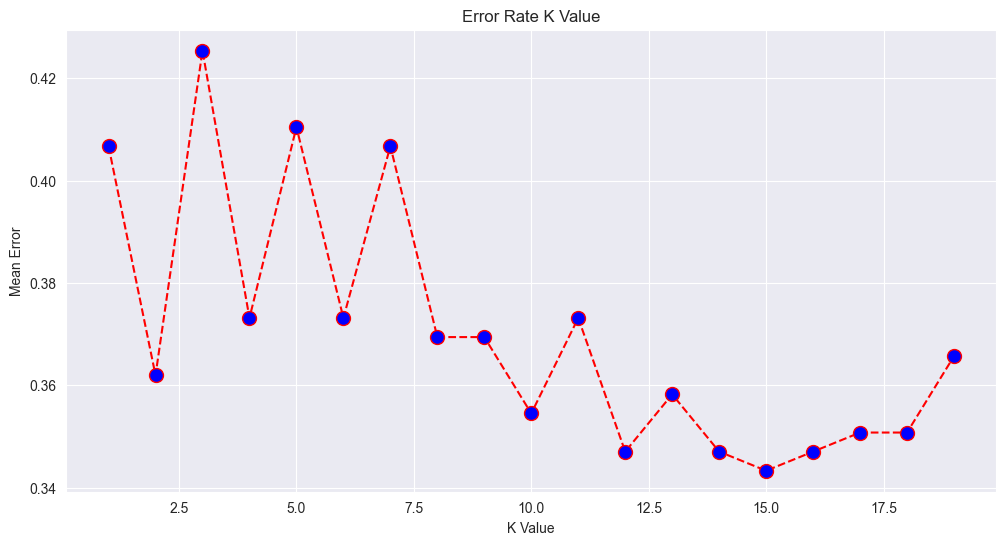

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error_mean, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Find the K value which gives the minimum mean of error:

In [30]:
error_mean= pd.DataFrame(data=error_mean, index=list(range(1,20)), columns=["Mean Error"])
error_mean

,Mean Error
1,0.406716
2,0.361940
3,0.425373
4,0.373134
5,0.410448
6,0.373134
7,0.406716
8,0.369403
9,0.369403
10,0.354478


In [31]:
error_mean.idxmin()

Mean Error    15
dtype: int64